In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('F://Uni/991/Pattern/SPR_HW4/inputs/P3/doughs.dat', 
                 sep="\s+", 
                 header=0, 
)
df.head()

,PressureLoad,DefVol,Bacteria,Yeast,pH,TTA,Restaurant
1,130.025683,35.527557,5.757972,6.542892,6.097234,1.111084,1
2,123.868507,40.345667,6.034986,6.317691,6.063427,1.138093,1
3,115.465972,26.587519,5.410269,6.668726,5.784212,1.199134,1
4,127.589924,41.191176,5.870146,6.534598,6.148323,0.986529,1
5,132.266467,45.740704,5.709261,6.838558,5.837073,1.619440,1


In [3]:
xdf = df.drop(columns='Restaurant')

## Computing S

In [4]:
xdf_mean = xdf - xdf.mean()

In [5]:
s = (df.shape[0]-1)*np.cov(xdf_mean.T)
#print(s.shape)

## Computing Eigenvalues and Eigenvectors

In [6]:
eigval, eigvec = np.linalg.eig(s)
print(eigval)
print(eigvec)

[4.22284393e+03 1.54252434e+03 2.65875883e+01 8.12218533e+00
 1.39520298e+00 3.00227145e-01]
[[ 8.84370251e-01  4.65810383e-01 -6.22350227e-03 -2.77065339e-02
   1.01664488e-02 -4.53617280e-04]
 [ 4.66360841e-01 -8.83012860e-01  4.41881535e-02  2.82278085e-02
  -6.22213682e-03 -2.78154961e-03]
 [ 1.54064543e-02 -4.07001426e-02 -9.98069103e-01  3.92422699e-02
   2.05966776e-02  1.63023637e-04]
 [-1.21722779e-02 -4.03776158e-02 -3.05303270e-02 -9.58336446e-01
   2.76180414e-01 -5.10393685e-02]
 [-1.57266377e-03 -1.58405327e-03  2.12996568e-02  1.66649576e-01
   7.07231888e-01  6.86725795e-01]
 [ 2.97135932e-03 -4.42859156e-03 -2.19309085e-02 -2.25199372e-01
  -6.50370003e-01  7.25117022e-01]]


In [7]:
#This part is not necesarry, I just wrote it to show that sorting is done
eigvec = eigvec[np.argsort((-1)*eigval)]
#print(eigvec.shape)
eigval = np.sort(eigval)[::-1]
print('Eigen Values: ')
print(eigval)
print('Eigen Vectors:')
print(eigvec)

Eigen Values: 
[4.22284393e+03 1.54252434e+03 2.65875883e+01 8.12218533e+00
 1.39520298e+00 3.00227145e-01]
Eigen Vectors:
[[ 8.84370251e-01  4.65810383e-01 -6.22350227e-03 -2.77065339e-02
   1.01664488e-02 -4.53617280e-04]
 [ 4.66360841e-01 -8.83012860e-01  4.41881535e-02  2.82278085e-02
  -6.22213682e-03 -2.78154961e-03]
 [ 1.54064543e-02 -4.07001426e-02 -9.98069103e-01  3.92422699e-02
   2.05966776e-02  1.63023637e-04]
 [-1.21722779e-02 -4.03776158e-02 -3.05303270e-02 -9.58336446e-01
   2.76180414e-01 -5.10393685e-02]
 [-1.57266377e-03 -1.58405327e-03  2.12996568e-02  1.66649576e-01
   7.07231888e-01  6.86725795e-01]
 [ 2.97135932e-03 -4.42859156e-03 -2.19309085e-02 -2.25199372e-01
  -6.50370003e-01  7.25117022e-01]]


## a.

In [8]:
sumlist = list()
s=0
seval = np.sum(eigval)
for k in eigval:
    sumlist.append((s+k)/seval)
print('Percentage of preservation:\n', sumlist)
print('Preserved: ',np.sum(sumlist[:3]))
print('Error: ',np.sum(sumlist[3:]))

Percentage of preservation:
 [0.7278539833995054, 0.2658711760073855, 0.004582665692436094, 0.001399948716819384, 0.00024047870594636394, 5.174747790729514e-05]
Preserved:  0.9983078250993269
Error:  0.0016921749006730432


## Computing Principal Components

In [9]:
a = np.dot(xdf_mean,eigvec[:3,:].T)
#print(a.shape)
print('Principal Components:')
print(a)

Principal Components:
[[ 1.34258203e+01  1.13091874e+01  9.67783762e-01]
 [ 1.02290825e+01  4.18928740e+00  3.90816502e-01]
 [-3.61926174e+00  1.24031672e+01  1.45286784e+00]
 [ 1.39099874e+01  5.17694735e+00  5.88496212e-01]
 [ 2.01541293e+01  3.34225937e+00  6.41573591e-01]
 [ 1.61879336e+01 -1.07325492e+01 -1.57150907e+00]
 [ 3.86856878e+00  8.35157150e+00  1.17171991e+00]
 [ 1.58332241e+01  6.65909122e-02 -1.53319126e+00]
 [ 6.83335710e-01  4.36511684e+00  2.75107905e-01]
 [ 5.93943683e+00 -9.08625980e+00 -2.01583051e+00]
 [-1.29753898e+01  4.78521406e+00  1.85882103e+00]
 [-5.61397811e+00  1.99397586e+00 -2.50223698e+00]
 [ 5.42272896e+00 -5.42752902e+00 -7.39891649e-03]
 [-7.96441703e+00  8.22028238e-01  2.21509351e-01]
 [-6.56620333e-01 -6.16101774e+00  7.68701462e-01]
 [-3.92027786e-01  1.65216268e+00  7.36816681e-01]
 [-2.47145354e+00  7.67524841e+00  1.37641822e+00]
 [-4.63915989e+00  7.92817483e+00  2.42739056e-01]
 [ 2.34978769e+01 -3.20847095e+00 -1.22134737e+00]
 [ 1.7385

## b.

In [10]:
from scipy.stats import kstest

In [11]:
print(kstest((a[:,0]-a[:,0].mean())/np.std(a[:,0]),'norm'))

KstestResult(statistic=0.11587468662828143, pvalue=0.7729756194935719)


In [12]:
print(kstest((a[:,1]-a[:,1].mean())/np.std(a[:,1]),'norm'))

KstestResult(statistic=0.13460958204090784, pvalue=0.6012768534568425)


In [13]:
print(kstest((a[:,2]-a[:,2].mean())/np.std(a[:,2]),'norm'))

KstestResult(statistic=0.13073097313548177, pvalue=0.6372086835056887)


## c.

### Mapping the Samples

In [14]:
newx = np.dot(xdf_mean,eigvec[:3,:].T)
print(newx.shape)

(30, 3)


### Plotting the samples

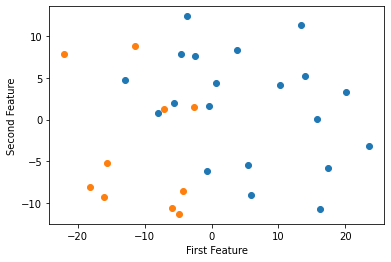

In [15]:
plt.scatter(newx[:20,0], newx[:20,1])
plt.scatter(newx[20:,0], newx[20:,1])
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.show()


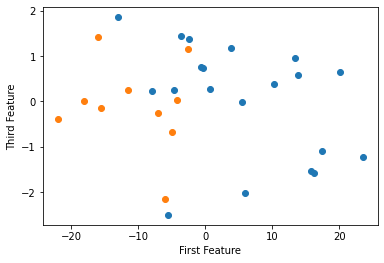

In [16]:
plt.scatter(newx[:20,0], newx[:20,2])
plt.scatter(newx[20:,0], newx[20:,2])
plt.xlabel('First Feature')
plt.ylabel('Third Feature')
plt.show()

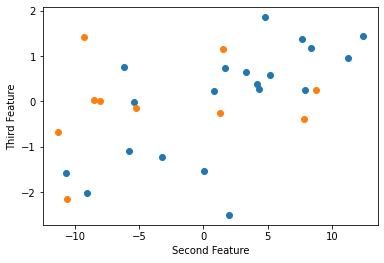

In [17]:
plt.scatter(newx[:20,1], newx[:20,2])
plt.scatter(newx[20:,1], newx[20:,2])
plt.xlabel('Second Feature')
plt.ylabel('Third Feature')
plt.show()

In [18]:
from mpl_toolkits.mplot3d import Axes3D

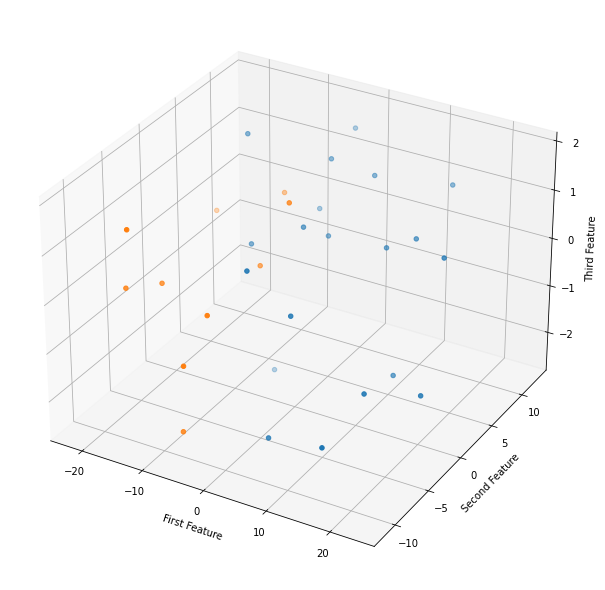

In [19]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.set_xlabel('First Feature')
ax.set_ylabel('Second Feature')
ax.set_zlabel('Third Feature')
ax.scatter(newx[:20,0], newx[:20,1], newx[:20,2])
ax.scatter(newx[20:,0], newx[20:,1], newx[20:,2])